# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [13]:
# Library Manipulasi Data
import pandas as pd
import numpy as np

# Library untuk Download & Ekstrak Data
import requests
import zipfile
import io

# Library Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Library Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Konfigurasi Visualisasi
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')

print("Library berhasil diimpor!")

Library berhasil diimpor!


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [14]:
#Type your code here
# URL Dataset Bank Marketing (Versi Lengkap)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip"

print("Sedang mengunduh dataset dari UCI Repository...")
try:
    # Mengirim request ke URL
    response = requests.get(url)

    # Membaca zip file dari bytes
    z = zipfile.ZipFile(io.BytesIO(response.content))

    # Ekstrak semua file
    z.extractall()
    print("Ekstrasi selesai.")

    # Membaca file CSV (Perhatikan sep=';')
    df = pd.read_csv('bank-additional/bank-additional-full.csv', sep=';')
    print("Dataset berhasil dimuat ke dalam DataFrame!")

except Exception as e:
    print(f"Terjadi kesalahan: {e}")

# Menampilkan 5 baris pertama
display(df.head())

# Cek Info Data
print("\nInformasi Dataset:")
df.info()

Sedang mengunduh dataset dari UCI Repository...
Ekstrasi selesai.
Dataset berhasil dimuat ke dalam DataFrame!


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no



Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.i

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

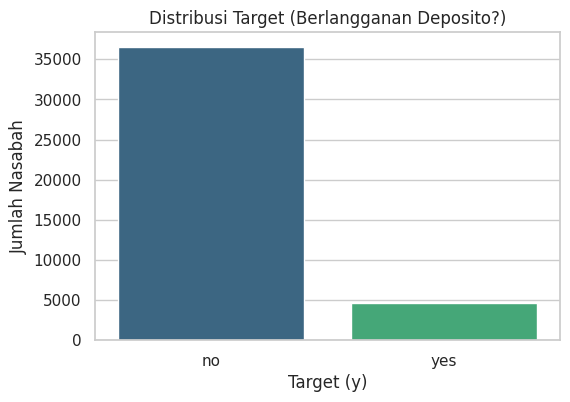

Rasio Target:
y
no     88.734583
yes    11.265417
Name: count, dtype: float64

Nilai Unik di Kolom Kategorikal (dan jumlah 'unknown'):
- job: 330 nilai 'unknown'
- marital: 80 nilai 'unknown'
- education: 1731 nilai 'unknown'
- default: 8597 nilai 'unknown'
- housing: 990 nilai 'unknown'
- loan: 990 nilai 'unknown'


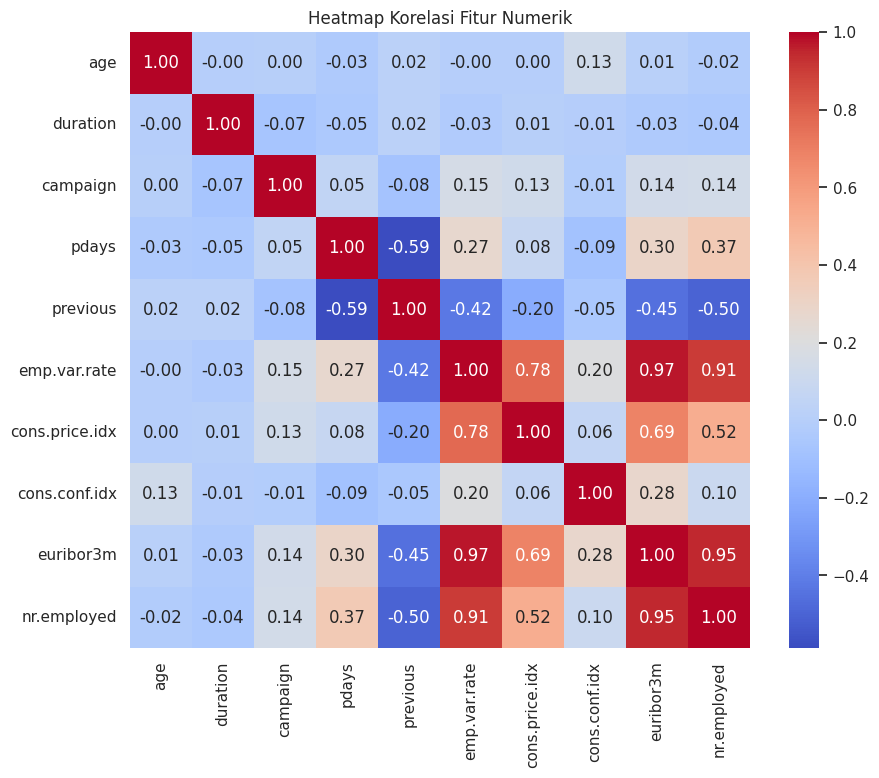

In [15]:
#Type your code here
# 1. Cek Distribusi Target (Penting untuk deteksi Imbalance)
plt.figure(figsize=(6, 4))
sns.countplot(x='y', data=df, palette='viridis')
plt.title('Distribusi Target (Berlangganan Deposito?)')
plt.xlabel('Target (y)')
plt.ylabel('Jumlah Nasabah')
plt.show()

# Hitung persentase
count_y = df['y'].value_counts()
print(f"Rasio Target:\n{count_y / len(df) * 100}")

# 2. Cek Kolom Kategorikal & Deteksi Nilai 'unknown'
cat_cols = df.select_dtypes(include=['object']).columns
print("\nNilai Unik di Kolom Kategorikal (dan jumlah 'unknown'):")
for col in cat_cols:
    unknown_count = (df[col] == 'unknown').sum()
    if unknown_count > 0:
        print(f"- {col}: {unknown_count} nilai 'unknown'")

# 3. Visualisasi Korelasi Fitur Numerik
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Fitur Numerik')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [16]:
# --- 1. Handling Duplicates ---
print(f"Jumlah baris sebelum hapus duplikat: {df.shape[0]}")
df.drop_duplicates(inplace=True)
print(f"Jumlah baris setelah hapus duplikat: {df.shape[0]}")

# --- 2. Handling 'unknown' sebagai Missing Values ---
df.replace('unknown', np.nan, inplace=True)

# Pisahkan Fitur (X) dan Target (y)
X = df.drop('y', axis=1)
y = df['y']

# --- 3. Encoding Target ---
le = LabelEncoder()
y = le.fit_transform(y)
print("\nMapping Target:", dict(zip(le.classes_, le.transform(le.classes_))))

# --- 4. Splitting Data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- 5. Pipeline Preprocessing ---
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# PERBAIKAN DISINI: Tambahkan sparse_output=False agar outputnya pasti array biasa
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Set output transform ke pandas agar langsung jadi DataFrame (Fitur baru Scikit-Learn)
preprocessor.set_output(transform="pandas")

# Terapkan Preprocessing
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Tidak perlu lagi mendefinisikan nama kolom manual atau .toarray()
# Karena kita sudah pakai set_output("pandas"), hasilnya otomatis DataFrame
print("\nData Preprocessing Selesai!")
print("Shape X_train_processed:", X_train_processed.shape)
display(X_train_processed.head())

Jumlah baris sebelum hapus duplikat: 41188
Jumlah baris setelah hapus duplikat: 41176

Mapping Target: {'no': np.int64(0), 'yes': np.int64(1)}

Data Preprocessing Selesai!
Shape X_train_processed: (32940, 57)


,num__age,num__duration,num__campaign,num__pdays,num__previous,num__emp.var.rate,num__cons.price.idx,num__cons.conf.idx,num__euribor3m,num__nr.employed,...,cat__month_oct,cat__month_sep,cat__day_of_week_fri,cat__day_of_week_mon,cat__day_of_week_thu,cat__day_of_week_tue,cat__day_of_week_wed,cat__poutcome_failure,cat__poutcome_nonexistent,cat__poutcome_success
36454,-1.532272,-0.527170,-0.202879,0.195027,1.657135,-1.896387,-1.057203,-0.062687,-1.357248,-1.252900,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1233,-0.766955,3.344770,-0.563899,0.195027,-0.348598,0.648985,0.722038,0.887842,0.712567,0.332805,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
24111,-0.671290,-0.348525,-0.563899,0.195027,-0.348598,-0.114627,-0.648202,-0.321922,0.361165,0.399107,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
15516,-0.192967,-0.499985,0.519161,0.195027,-0.348598,0.839888,0.590881,-0.473142,0.771326,0.845259,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
17916,-0.097303,-0.235901,0.519161,0.195027,-0.348598,0.839888,0.590881,-0.473142,0.773630,0.845259,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


# **Kesimpulan Eksperimen**

Tahap preprocessing telah berhasil dilakukan dengan rincian:
1.  **Handling Duplicate**: Menghapus data ganda.
2.  **Handling Missing Value**: Nilai 'unknown' diubah jadi NaN dan diimputasi (Median untuk numerik, Modus untuk kategorikal).
3.  **Encoding**: Label Encoding untuk target dan OneHotEncoding untuk fitur kategorikal.
4.  **Scaling**: StandardScaler diterapkan pada fitur numerik.

Langkah-langkah ini telah dikonversi menjadi file script otomatis `automate_Zaky.py` untuk kebutuhan production.

In [17]:
%%writefile automate_Zaky.py
import pandas as pd
import numpy as np
import requests
import zipfile
import io
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

def load_data():
    """
    Fungsi untuk memuat dataset Bank Marketing dari UCI.
    """
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip"
    print("Mengunduh dataset...")
    try:
        response = requests.get(url)
        z = zipfile.ZipFile(io.BytesIO(response.content))
        z.extractall()
        # Membaca file (separator adalah titik koma)
        df = pd.read_csv('bank-additional/bank-additional-full.csv', sep=';')
        print("Dataset berhasil dimuat.")
        return df
    except Exception as e:
        print(f"Error loading data: {e}")
        return None

def preprocess_data(df):
    """
    Fungsi untuk membersihkan data, encoding, dan scaling.
    Mengembalikan X_train, X_test, y_train, y_test yang siap latih.
    """
    # 1. Handling Duplicates
    df = df.drop_duplicates()

    # 2. Handling 'unknown' -> NaN
    df.replace('unknown', np.nan, inplace=True)

    # 3. Pisahkan Fitur dan Target
    target_col = 'y'
    if target_col not in df.columns:
        raise ValueError(f"Kolom target '{target_col}' tidak ditemukan.")

    X = df.drop(target_col, axis=1)
    y = df[target_col]

    # 4. Encoding Target (No=0, Yes=1)
    le = LabelEncoder()
    y = le.fit_transform(y)

    # 5. Split Data (Stratified)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # 6. Pipeline Preprocessing
    numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
    categorical_features = X.select_dtypes(include=['object']).columns

    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ],
        verbose_feature_names_out=False
    )

    # Agar output tetap pandas DataFrame
    preprocessor.set_output(transform="pandas")

    # Fit & Transform
    X_train_processed = preprocessor.fit_transform(X_train)
    X_test_processed = preprocessor.transform(X_test)

    print("Preprocessing selesai.")
    print(f"Shape Train: {X_train_processed.shape}, Shape Test: {X_test_processed.shape}")

    return X_train_processed, X_test_processed, y_train, y_test

if __name__ == "__main__":
    # Blok ini hanya berjalan jika file dieksekusi langsung (python automate_Zaky.py)
    df = load_data()
    if df is not None:
        X_train, X_test, y_train, y_test = preprocess_data(df)
        print("Automasi berhasil!")

Overwriting automate_Zaky.py


In [18]:
# Mengimpor modul yang baru saja kita buat
import automate_Zaky as az

# Menjalankan fungsi load
df_raw = az.load_data()

# Menjalankan fungsi preprocessing
X_train, X_test, y_train, y_test = az.preprocess_data(df_raw)

# Cek hasil
display(X_train.head())

Mengunduh dataset...
Dataset berhasil dimuat.
Preprocessing selesai.
Shape Train: (32940, 57), Shape Test: (8236, 57)


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
36454,-1.532272,-0.527170,-0.202879,0.195027,1.657135,-1.896387,-1.057203,-0.062687,-1.357248,-1.252900,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1233,-0.766955,3.344770,-0.563899,0.195027,-0.348598,0.648985,0.722038,0.887842,0.712567,0.332805,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
24111,-0.671290,-0.348525,-0.563899,0.195027,-0.348598,-0.114627,-0.648202,-0.321922,0.361165,0.399107,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
15516,-0.192967,-0.499985,0.519161,0.195027,-0.348598,0.839888,0.590881,-0.473142,0.771326,0.845259,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
17916,-0.097303,-0.235901,0.519161,0.195027,-0.348598,0.839888,0.590881,-0.473142,0.773630,0.845259,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
